In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [2]:
# Likely to be a false positive
tic = 284990199

# Load the light_curves into collection
lcf_coll = download_lightcurvefiles(f"TIC{tic}", mission='TESS', download_dir='./data', use_cache='yes')
print(len(lcf_coll))


1


In [3]:
# search_res = lk.search.search_lightcurvefile(f"TIC{tic}", mission='TESS')
# search_res.table


In [4]:
if False: 
    fig = plt.figure(figsize=(30,15))
    tplt.plot_lcf_flux_delta(tplt.lcf_of_sector(lcf_coll, 14), fig.gca()
    #                     , xmin=1452, xmax=1458
                       )


Sectors: [14]


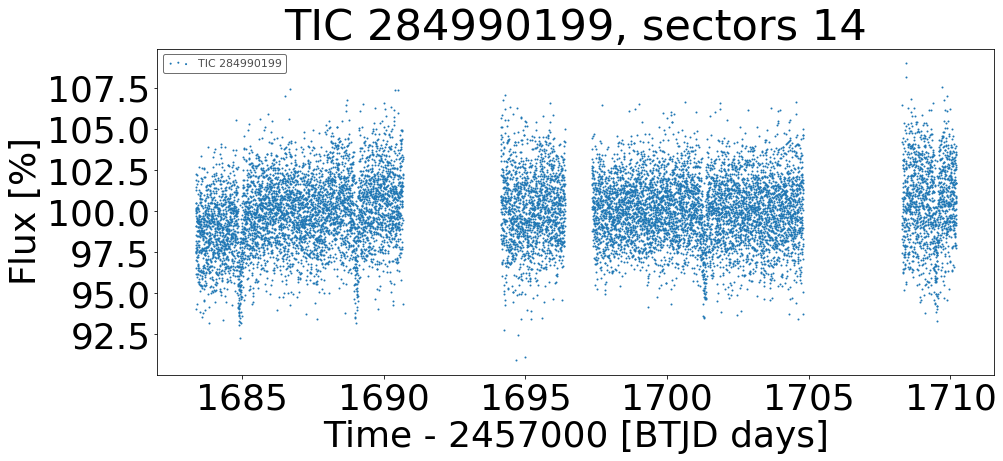

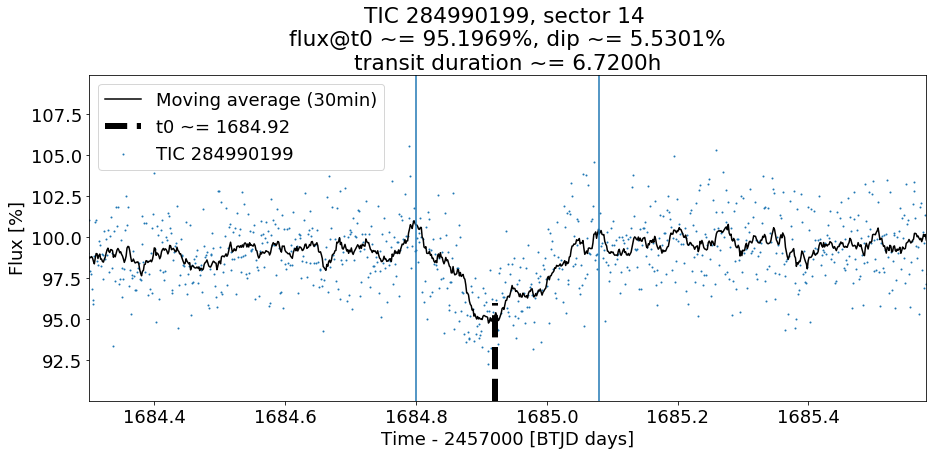

In [5]:
def plot_selected(lcf_coll):                      
    matplotlib.rcParams.update({'font.size':18}) 
    matplotlib.rcParams.update({'font.family':'sans-serif'})
    # only sector 14 for now
    tplt.plot_n_annotate_lcf(tplt.lcf_of_sector(lcf_coll, 14), ax=tplt.lcf_fig().gca()
                        , t0=1684.92, t_start=1684.80, t_end=1685.08
                       )
#     print(f"Period ~= {as_4decimal(1622.5 - 1538.6)} days")
    return 

                     
tplt.plot_all(lcf_coll)

# likely to be a contanimation of eclipsing binaries,
# 1. the dip is V-shaped
# 2. centroid offsets from vetting summary also indicated so: https://www.zooniverse.org/projects/nora-dot-eisner/planet-hunters-tess/talk/2110/1127610?comment=1853815&page=1
plot_selected(lcf_coll)

print("Sectors: " + str(list(map(lambda lcf: lcf.header()['SECTOR'], lcf_coll))))


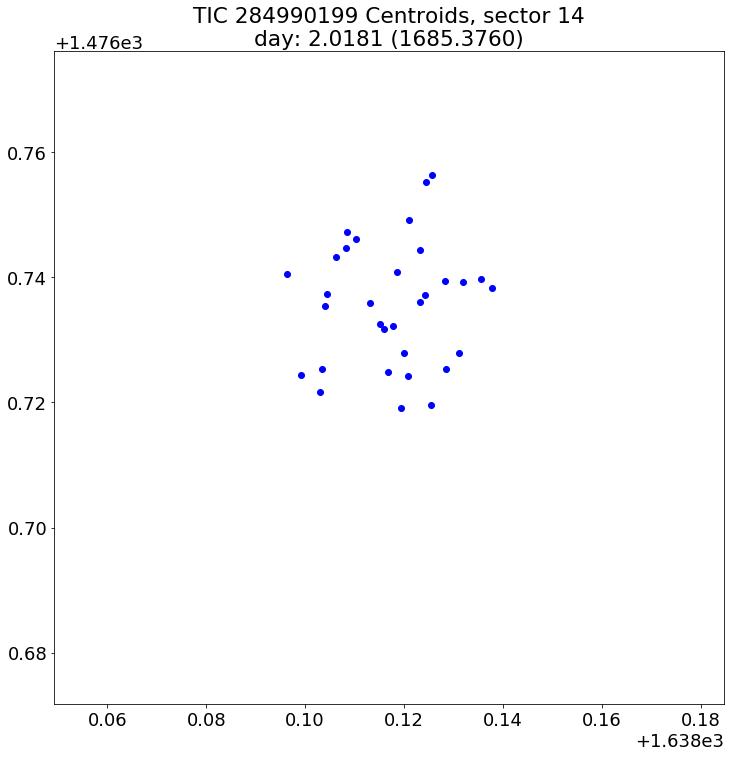

In [9]:
# import importlib
# importlib.reload(tplt)

# observe centroid changes over time
lcf = tplt.lcf_of_sector(lcf_coll, 14)
tplt.animate_centroids(lcf
                       , frames=list(map(lambda n: int(n), np.linspace(720, 720 + 720, num=24, endpoint=True)))
                       , interval=750
                       , c='blue', accumulative=False, use_relative_time=True)


In [7]:
print(list(map(lambda lc: lc.header()['SECTOR'], lcf_coll)))
print(list(map(lambda lc: lc.header()['CAMERA'], lcf_coll)))
print(list(map(lambda lc: lc.header()['DATE-OBS'], lcf_coll)))

ary = ['zero', 'one', 'two']
ary[-2]

[14]
[1]
['2019-07-18T20:19:29.942Z']


'one'

In [8]:
# combine all the observations together
# or I can just use lcf_coll.stich()
lc = None
for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    if lc == None:
        lc = lc_cur    
    else:
        lc.append(lc_cur, inplace=True)
    
print(len(lc.time))

for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    print(f"  Sector {lcf_coll[i].header()['SECTOR']}: {lc_cur.time.min()} - {lc_cur.time.max()}")

print(lc.time.max()  - lc.time.min())

# use the interactive transit period detection
#   caveat: un-sure if combining observations over time make sense for the algorithm
lc.interact_bls()


18522
  Sector 14: 1683.3579835514413 - 1710.2078160403423
26.84983248890103
